<a href="https://colab.research.google.com/github/Ayan2109/Titanic_Disaster_ML_Project/blob/main/Project_1(Titanic_Machine_Learning_from_Disaster)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c titanic


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd 

#reading the csv file
df = pd.read_csv('train.csv')
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#cleaning the data set and dropping values which are not required
df['Sex'].replace(to_replace = ['male','female'], value = [0,1], inplace = True)
df.drop('Cabin', axis = 1, inplace= True)
df.drop('Embarked', axis = 1 , inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500


In [ ]:
#checking for any null value in the data set
df.isnull().sum()

#dropping all the rows having some value as null or infinite
df = df.dropna()


In [ ]:
df.shape #shape of the dataset after clean Up

(714, 9)

In [ ]:
import numpy as np

#Creating X data set
X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].values

#creating Y data set
y = df[['Survived']].values
print(X.shape)
print(y.shape)


(714, 6)
(714, 1)


In [ ]:
from sklearn import preprocessing
#Normalizing the X data set
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.72853202,  0.91123237, -0.75905134, -0.53037664,  0.52457013,
        -0.50589515],
       [-1.7246701 , -1.47636364,  1.31743394,  0.57183099,  0.52457013,
        -0.50589515],
       [-1.72080817,  0.91123237,  1.31743394, -0.25482473, -0.55170307,
        -0.50589515],
       [-1.71694624, -1.47636364,  1.31743394,  0.36516706,  0.52457013,
        -0.50589515],
       [-1.71308431,  0.91123237, -0.75905134,  0.36516706, -0.55170307,
        -0.50589515]])

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
#Splitting the data set into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 4)
print("Train Set {}".format(X_train.shape))
print("Test set {}".format(X_test.shape))

Train Set (571, 6)
Test set (143, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression 
#Creating ml model using logistic regresion algorithm
LR = LogisticRegression(C= 0.01, solver = 'liblinear').fit(X_train,y_train)

#predicting the y value on test data 
yhat = LR.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
#calculating the accuracy and jaccard score 
print("accuracy score {}".format(accuracy_score(y_test,yhat)))
print("jaccard score {}".format(jaccard_score(y_test,yhat)))

accuracy score 0.7902097902097902
jaccard score 0.589041095890411


In [ ]:
#Reading the test File to test our LR model on new data with unkown depending value
test_data = pd.read_csv('test.csv')
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Cleaning the Data Set
test_data['Sex'].replace(to_replace = ['male','female'], value = [0,1], inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Embarked', axis = 1, inplace = True)
test_data.drop('Ticket', axis = 1, inplace = True)
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875


In [ ]:
test_data = test_data.dropna()

In [ ]:
X_test = test_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch']].values
X_test.shape

(331, 6)

In [ ]:
#Normalizing the dataSet
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[-1.69675037,  1.01542612, -0.78901776,  0.30665727, -0.55327231,
        -0.49211953],
       [-1.68860203,  1.01542612,  1.2673986 ,  1.19423645,  0.59130978,
        -0.49211953],
       [-1.68045369, -0.16804587, -0.78901776,  2.25933148, -0.55327231,
        -0.49211953],
       [-1.67230535,  1.01542612, -0.78901776, -0.22589024, -0.55327231,
        -0.49211953],
       [-1.66415701,  1.01542612,  1.2673986 , -0.58092192,  0.59130978,
         0.74190748]])

In [ ]:
predictedVal = LR.predict(X_test)
predictedVal


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [ ]:
predictedValues = predictedVal.tolist()
PassengerID = test_data[['PassengerId']].values.tolist()


In [ ]:
data = { 'PassengerId': PassengerID,
          'Survived': predictedValues}

In [ ]:
#creating a data frame with the predicted value and passengerId
Final_Survived_table = pd.DataFrame(data, columns = ['PassengerId','Survived'])
Final_Survived_table.head()

,PassengerId,Survived
0,[892],0
1,[893],0
2,[894],0
3,[895],0
4,[896],1


In [ ]:
no_of_pass = Final_Survived_table['Survived'].value_counts()
no_of_pass

0    207
1    124
Name: Survived, dtype: int64

In [ ]:
Surv = no_of_pass.keys()
Surv

Int64Index([0, 1], dtype='int64')

In [ ]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

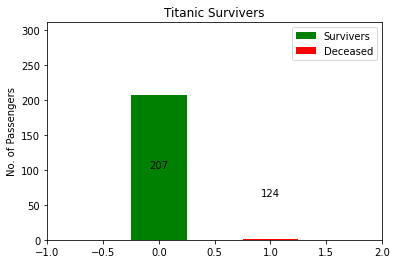

In [ ]:

Y = no_of_pass
X = Surv
plt.figure()
plt.bar(X[0],Y[0], width = 0.5, label="Survivers", color = 'g')
plt.bar(X[1],y[1], width = 0.5, label="Deceased", color = 'r')
plt.plot()
addlabels(X,Y)
plt.margins(x=0.5,y=0.5)
plt.ylabel('No. of Passengers')
plt.title('Titanic Survivers')
plt.legend()
plt.show()